In [58]:
# 1. Preprocessing
## 1.1 How to use image data in Python
from PIL import Image
from numpy import asarray
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(666, 1000, 3)
<class 'numpy.ndarray'>


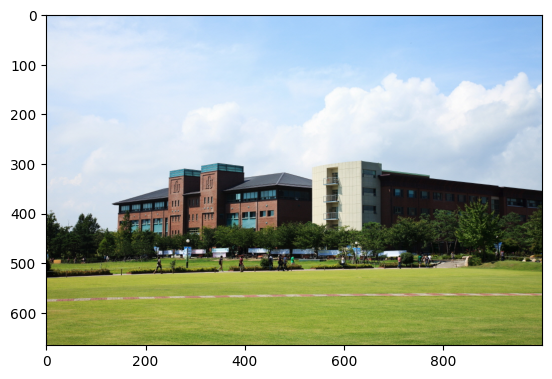

In [59]:
img = Image.open('./data/school.jpg')

numpydata = asarray(img)
print(numpydata.shape)
print(type(numpydata))
plt.imshow(numpydata)

shape: (666, 1000, 3)
type: <class 'numpy.ndarray'>


(-0.5, 299.5, 299.5, -0.5)

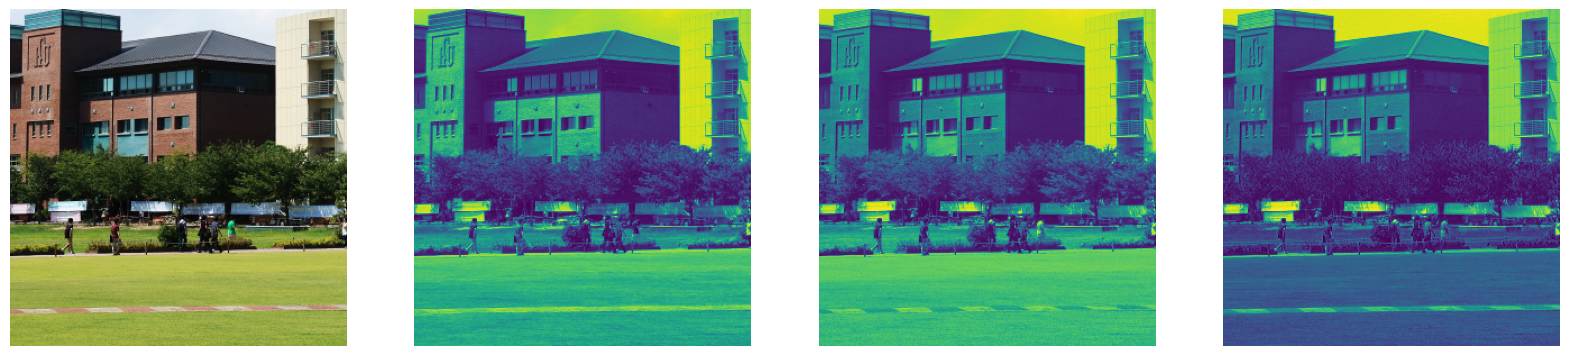

In [60]:
plt.figure(figsize=(20,5))

print('shape:', numpydata.shape)
print('type:', type(numpydata))

plt.subplot(141)
plt.imshow(numpydata[300:600, 300:600, :])
plt.axis("off")

plt.subplot(142)
plt.imshow(numpydata[300:600, 300:600, 0])
plt.axis("off")

plt.subplot(143)
plt.imshow(numpydata[300:600, 300:600, 1])
plt.axis("off")

plt.subplot(144)
plt.imshow(numpydata[300:600, 300:600, 2])
plt.axis("off")

<class 'numpy.ndarray'>
(666, 1000)


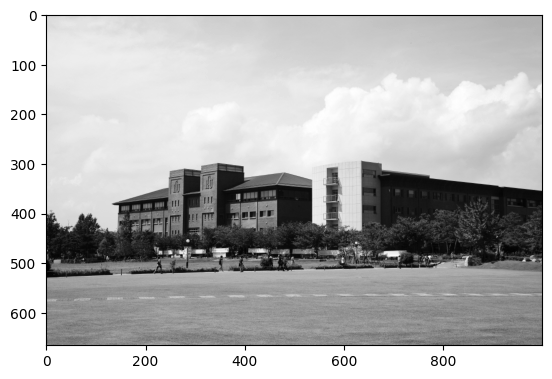

In [81]:
img = Image.open('./data/school.jpg').convert('L')
numpydata = asarray(img)
print(type(numpydata))
print(numpydata.shape)
plt.imshow(numpydata, cmap='gray')

(1000, 666)
(300, 200)


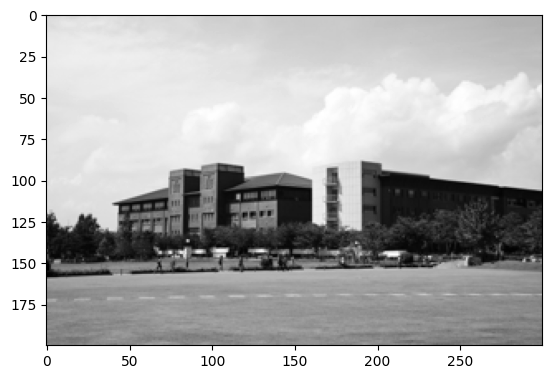

In [62]:
print(img.size)
img2 = img.resize((300, 200))
print(img2.size)
plt.imshow(img2, cmap='gray')

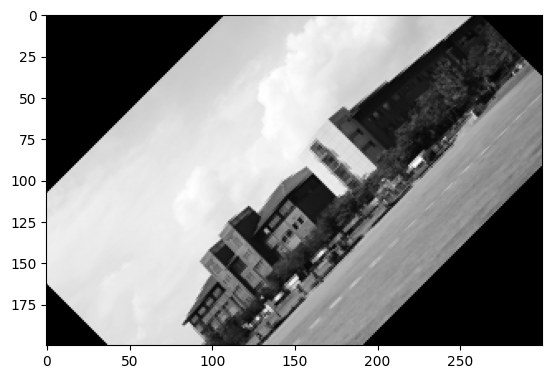

In [63]:
img3 = img2.rotate(45)
plt.imshow(img3, cmap='gray')

In [64]:
## 1.2 Histogram equalization
def histeq(im, nbr_bins=256):

    # get image histogram
    imhist, bins = histogram(im.flatten(), nbr_bins, density=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape), cdf

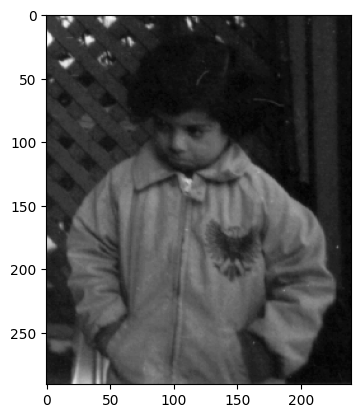

In [65]:
from PIL import Image
from numpy import *

im = array(Image.open('./data/girl.jpg').convert('L'))
plt.imshow(im, cmap='gray')

<class 'numpy.ndarray'>


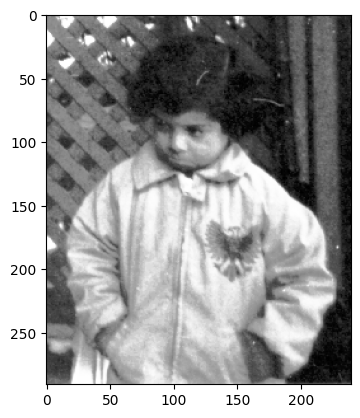

In [66]:
im2,cdf = histeq(im)

print(type(im2))
plt.imshow(im2, cmap='gray')

In [67]:
# 2. CNN with MNIST Dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(60000, 28, 28)
(60000,)
<class 'numpy.uint8'>


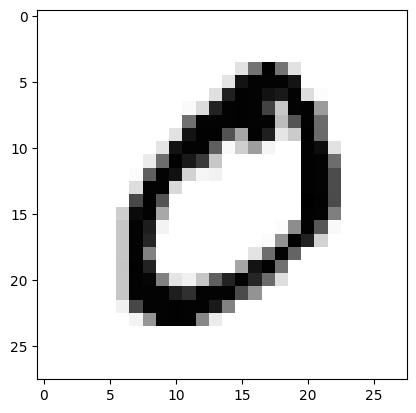

In [68]:
## 2.1 MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(type(x_train[0,0,0]))

x_train_n = x_train.astype('float32') / 255
n = 1
plt.imshow(x_train_n[n], cmap='Greys', interpolation='nearest')
plt.show()

In [69]:
x_train_n = x_train_n.reshape(x_train.shape[0], 28, 28, 1)
print(x_train_n.shape)

x_test_n = x_test.astype('float32') / 255.
x_test_n = x_test_n.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

(60000, 28, 28, 1)


In [70]:
print(y_train[0:10])
num_classes = 10
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)
print(y_train_c[0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [71]:
## 2.2 Model Building
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [72]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same',
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) # What is pooling?
model.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [74]:
## 2.3 Model Training
batch_size = 128
epochs = 12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train_n, y_train_c,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test_n, y_test_c))

Epoch 1/12
469/469 [==============================] - 106s 223ms/step - loss: 0.1853 - accuracy: 0.9426 - val_loss: 0.0492 - val_accuracy: 0.9836
Epoch 2/12
469/469 [==============================] - 103s 220ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0364 - val_accuracy: 0.9871
Epoch 3/12
469/469 [==============================] - 103s 219ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 4/12
469/469 [==============================] - 101s 216ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0333 - val_accuracy: 0.9881
Epoch 5/12
469/469 [==============================] - 101s 216ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 106s 225ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0245 - val_accuracy: 0.9916
Epoch 7/12
469/469 [==============================] - 105s 223ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0241 -

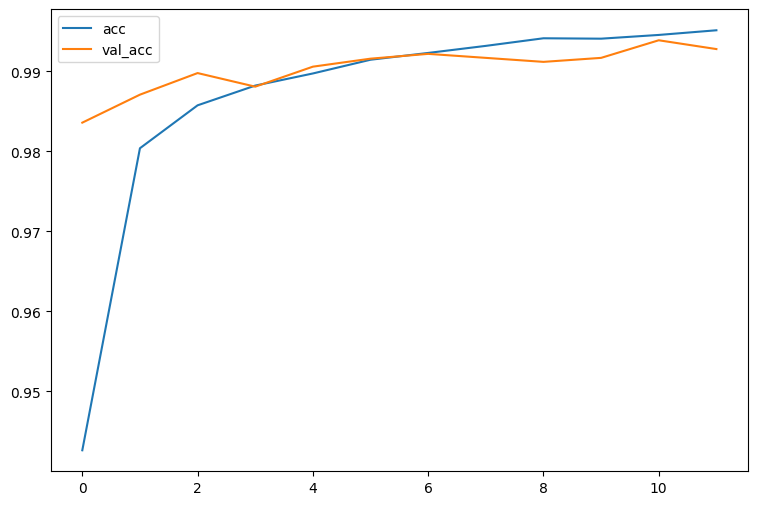

In [75]:
## 2.4 Results
plt.figure(figsize=(9,6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

In [76]:
## 2.5 Wrong Predicted Image
import random
predicted_result = model.predict(x_test_n)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test_c, axis=1)
wrong_result = []

for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)

313/313 [==============================] - 6s 19ms/step


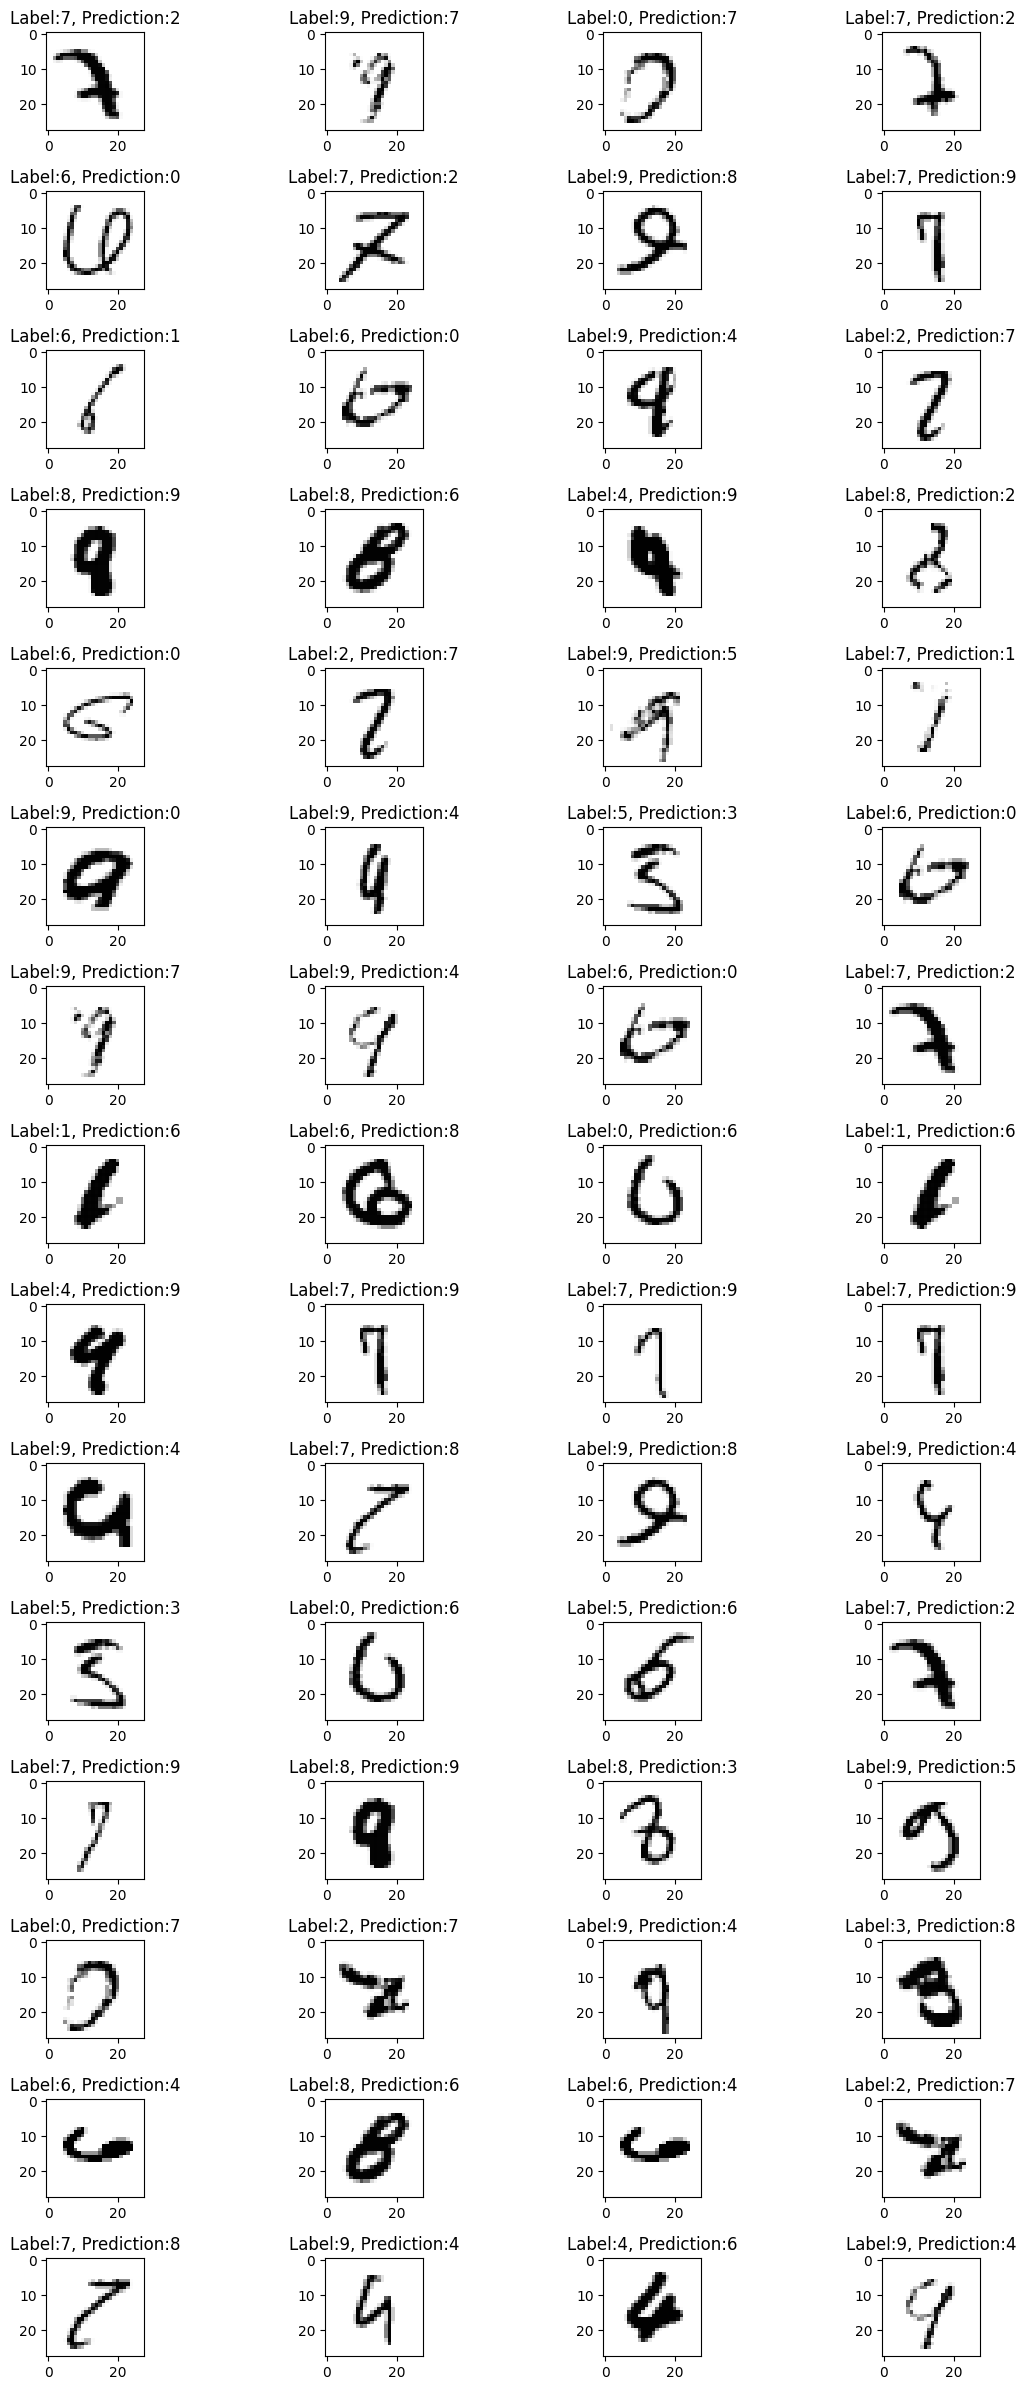

In [77]:
samples = random.choices(population=wrong_result, k=60)
count = 0
plt.figure(figsize=(12,24))
for n in samples:
  count += 1
  plt.subplot(15, 4, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)
plt.tight_layout()
plt.show()

In [78]:
print(len(test_labels), ",", len(wrong_result))
print(x_train.shape, y_train.shape, x_train_n.shape, y_train_c.shape)
print(x_test.shape, y_test.shape, x_test_n.shape, y_test_c.shape)


10000 , 72
(60000, 28, 28) (60000,) (60000, 28, 28, 1) (60000, 10)
(10000, 28, 28) (10000,) (10000, 28, 28, 1) (10000, 10)


In [79]:
print(x_train_n[0])